# EXPLORING SALES DATA WITH PANDAS

## Data Loading and Inspection


In [3]:
# Importing pandas library
import pandas as pd
import matplotlib.pyplot as plt


/Users/nathanomenge/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/nathanomenge/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Loading and Viewing the First and Last Ten rows of the Dataset

In [4]:
# Loading the dataset 
df = pd.read_csv('/Users/nathanomenge/Desktop/Sales Data .csv')


In [5]:
# Showing the first ten rows of the dataset
print(df.head(10))


         Date  ProductID                  ProductName         Category  \
0  07/10/2023       1016        style carry everybody      Electronics   
1   3/21/2022       1212                so stay write   Home & Kitchen   
2  12/25/2022       9600             toward lawyer we  Beauty & Health   
3   6/21/2023       3455              our now foreign      Electronics   
4  09/03/2022       7054               always tree be         Clothing   
5  08/10/2022       1217            ago person speech      Electronics   
6   1/19/2024       4191         without answer maybe  Beauty & Health   
7  01/09/2023       2742  possible describe everybody         Clothing   
8  01/09/2023       3767           job various writer  Beauty & Health   
9  12/09/2022       2737             pick control red   Home & Kitchen   

   Quantity  UnitPrice  CustomerID         Country  
0        11       0.36       38452         Germany  
1         4      38.33       46321          France  
2         9      89.57    

In [6]:
# Showing the last ten rows of the dataset
print(df.tail(10))


          Date  ProductID             ProductName         Category  Quantity  \
90  12/31/2023       4041      several music past      Electronics        19   
91   2/18/2023       7863  attorney wonder memory   Home & Kitchen        20   
92  10/10/2023       9421        fear three since  Beauty & Health        10   
93   4/27/2023       7258     movie magazine pass      Electronics         2   
94   1/15/2024       5313        respond time ten     Toys & Games        11   
95   8/26/2023       9437      keep evening argue   Home & Kitchen         7   
96   7/13/2023       5286       pick likely shake         Clothing        10   
97   7/18/2022       5471       idea simply peace     Toys & Games        14   
98   3/30/2023       8363       check save result     Toys & Games        18   
99  04/09/2023       7418       central know name      Electronics        17   

    UnitPrice  CustomerID         Country  
90      15.20       33902         Germany  
91      80.77       51029      

### Summary Statistics and Information about the Dataset

In [7]:
print("Summary Statistics:\n", df.describe(), "\n")
df.info()

Summary Statistics:
          ProductID    Quantity   UnitPrice    CustomerID
count   100.000000  100.000000  100.000000    100.000000
mean   5704.560000   10.280000   55.435800  54707.830000
std    2594.129481    5.777141   28.010442  25094.331123
min    1016.000000    1.000000    0.360000  10096.000000
25%    3548.000000    6.000000   36.382500  32641.000000
50%    5504.500000   10.000000   58.755000  51263.500000
75%    8000.500000   16.000000   77.645000  76313.000000
max    9999.000000   20.000000   99.110000  99790.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         100 non-null    object 
 1   ProductID    100 non-null    int64  
 2   ProductName  100 non-null    object 
 3   Category     100 non-null    object 
 4   Quantity     100 non-null    int64  
 5   UnitPrice    100 non-null    float64
 6   CustomerID   100 non

# Data Cleaning

## Identifying and handling missing values in the dataset.

In [8]:
# Checking for missing values 
missing_values = df.isnull().sum()
print(missing_values)


Date           0
ProductID      0
ProductName    0
Category       0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Removing any duplicate records.

In [9]:
# Checking for duplicate records
duplicates = df.duplicated()
print(duplicates)


0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


## Converting the Date column to datetime format

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date  ProductID            ProductName         Category  Quantity  \
0 2023-07-10       1016  style carry everybody      Electronics        11   
1 2022-03-21       1212          so stay write   Home & Kitchen         4   
2 2022-12-25       9600       toward lawyer we  Beauty & Health         9   
3 2023-06-21       3455        our now foreign      Electronics         2   
4 2022-09-03       7054         always tree be         Clothing        11   

   UnitPrice  CustomerID        Country  
0       0.36       38452        Germany  
1      38.33       46321         France  
2      89.57       33071        Germany  
3      67.55       75434  United States  
4      89.71       43033        Germany  


# Data Analysis & Visualization

## Calculate the total sales (Quantity * UnitPrice) for each product and display the top 10 products with the highest total sales.

In [11]:
# Calculating the total sales for all products .
df['Total_Sales'] = df['Quantity'] * df['UnitPrice']

In [12]:
# Calculating the total sales per product across the entire data frame
sales_per_product = df.groupby('ProductName')['Total_Sales'].sum()


In [13]:
top_10_products = sales_per_product.sort_values (ascending=False).head(10)
print (top_10_products)

ProductName
give laugh only              1686.40
suddenly marriage design     1683.21
attorney wonder memory       1615.40
set million back             1573.12
that out range               1567.04
without answer maybe         1508.04
world standard television    1362.89
idea simply peace            1271.90
large situation arrive       1253.76
fly set but                  1236.69
Name: Total_Sales, dtype: float64


## Find the total number of sales (count of transactions) per country and visualize it using a bar chart.

In [14]:
# Computing the total sales per country
sales_per_country = df.groupby('Country').size().sort_values(ascending=False)
print(sales_per_country)

Country
Germany           25
United Kingdom    24
Canada            19
France            17
United States     15
dtype: int64


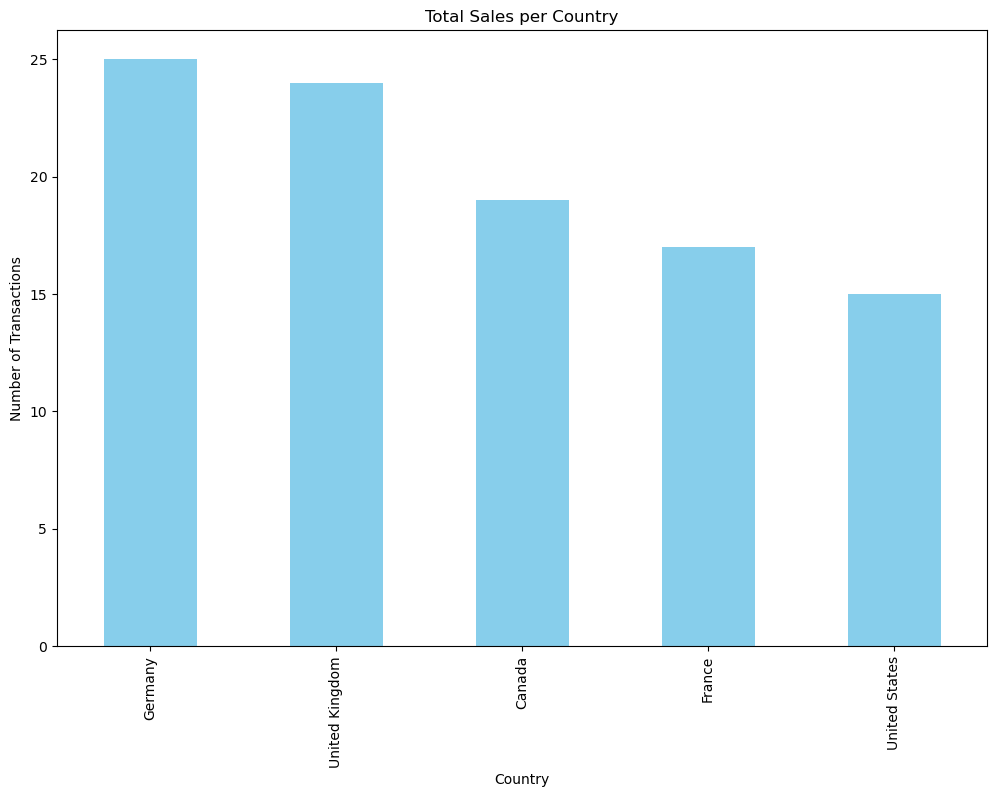

In [15]:
# Visualising the data
# Sizing the plot appropriately
plt.figure(figsize=(12, 8))
# Generating the plot
sales_per_country.plot(kind='bar', color='skyblue')
# Plot Title and Axes Value
plt.title('Total Sales per Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()


## Analyze sales trends over time. Group the data by month and plot the total sales per month

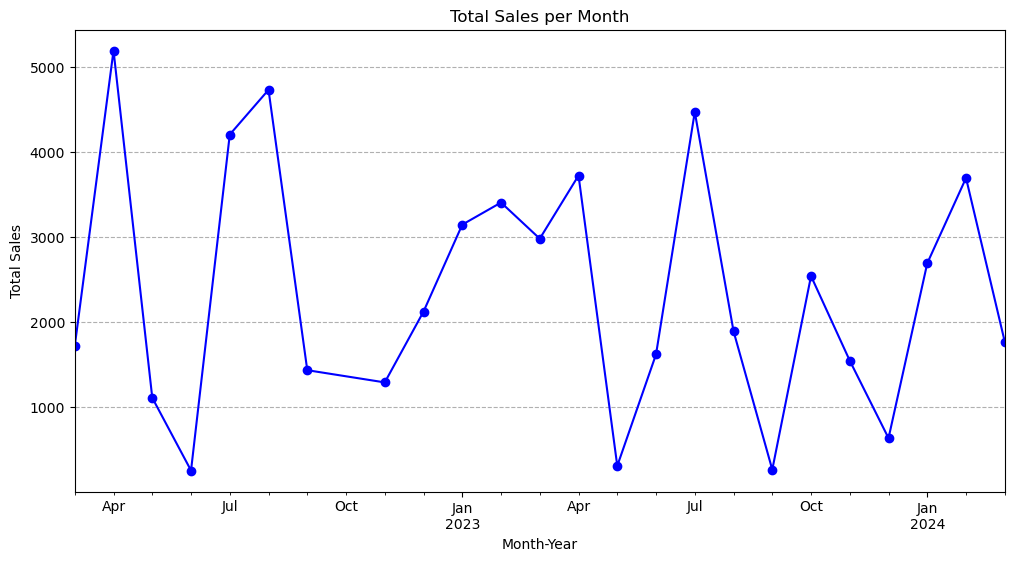

In [23]:
# Calculating Total Sales for Each Transaction
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Extracting the Month and Year from the Date
df['MonthYear'] = df['Date'].dt.to_period('M')

# Grouping the Data by Month-Year and Calculate Total Sales for Each Month
monthly_sales = df.groupby('MonthYear')['TotalSales'].sum()

# Plotting the Total Sales per Month
# Adjusting the figure size 
plt.figure(figsize=(12, 6))  
# Customizing colour and  graph marker
monthly_sales.plot(kind='line', marker = 'o', color='blue')  
# Setting Plot title and Axes Labels
plt.title('Total Sales per Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')

# Adding horizontal grid lines for readability
plt.grid(axis='y', linestyle='--')  
plt.show()



In [25]:
#Grouping data by Product Category and sum Total Sales
category_sales = df.groupby('Category')['TotalSales'].sum()

# Identifying the Best-Selling Category
best_selling_category = category_sales.idxmax()
best_selling_category_sales = category_sales.max()

#Printing an output
print(f"The best-selling product category is '{best_selling_category}' with total sales of {best_selling_category_sales}.")

The best-selling product category is 'Beauty & Health' with total sales of 13105.51.


In [29]:
# Computing total sales by customer
total_sales_by_customer = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)

#  Top 10 customers by total sales amount
top_10_customers = total_sales_by_customer.head(10)
print(top_10_customers)


CustomerID
27315    1686.40
87430    1683.21
51029    1615.40
91076    1573.12
38956    1567.04
67582    1508.04
43431    1362.89
98775    1271.90
18374    1253.76
63093    1236.69
Name: TotalSales, dtype: float64
